In [231]:
!pip install pmdarima 

In [194]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df=pd.read_csv('Sales.csv')

# Data Understanding:

df.head(5)

In [8]:
df.shape

(913000, 4)

In [9]:
df.describe()

store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [206]:
#Converting the date field in object datatype to date datatype
df['date'] =  pd.to_datetime(df['date'])

In [207]:
#Checking for null values in dataset
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [208]:
df[['store']].nunique()

store    10
dtype: int64

In [209]:
df[['item']].nunique()

item    50
dtype: int64

In [210]:
df.groupby('store').agg({'item': 'nunique'})

item
store      
1        50
2        50
3        50
4        50
5        50
6        50
7        50
8        50
9        50
10       50

# EDA

C:\Users\NW653DP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales Distirbution Graph')

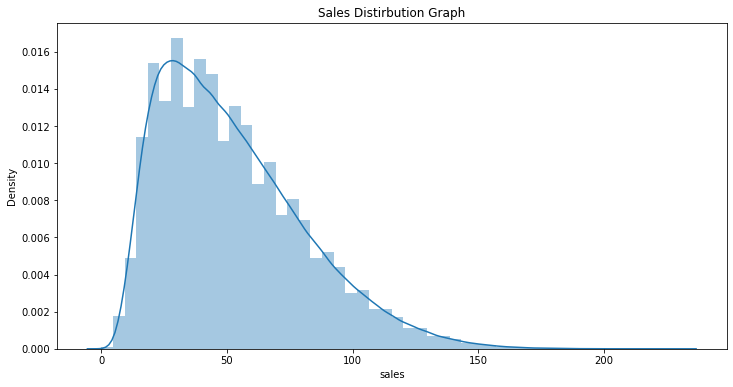

In [211]:
sns.distplot(df['sales'])
plt.title("Sales Distirbution Graph")

# Feature Engineerng:

In [212]:
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['dayofweek'] = df.date.dt.dayofweek
df['daysinmonth'] = df.date.dt.day
df['quarter'] = df.date.dt.quarter

<AxesSubplot:xlabel='year'>

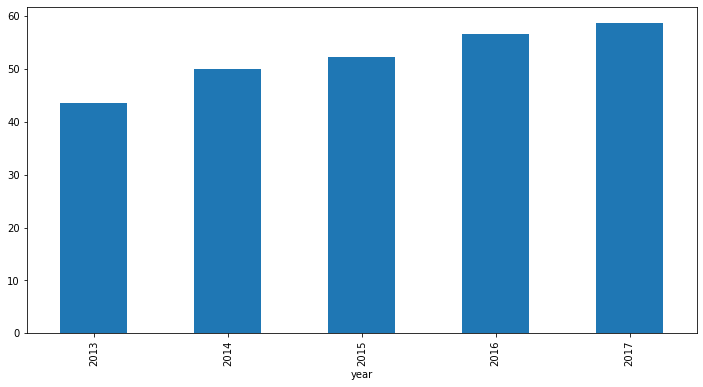

In [213]:
df.groupby(['year'])['sales'].mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

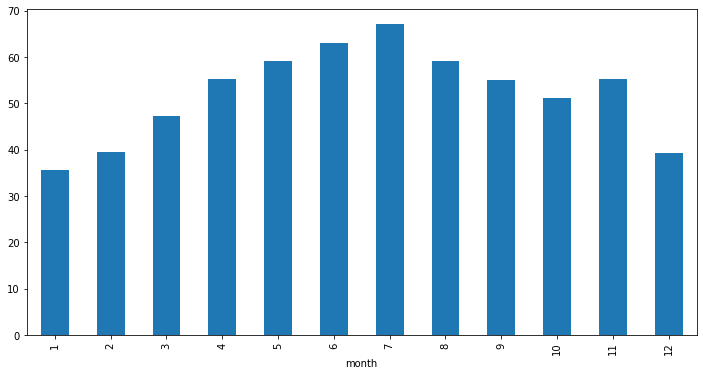

In [214]:
df.groupby(['month'])['sales'].mean().plot(kind='bar')

<AxesSubplot:xlabel='dayofweek'>

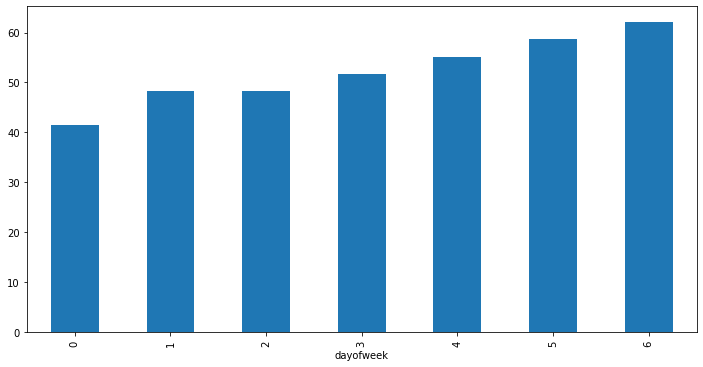

In [215]:
df.groupby(['dayofweek'])['sales'].mean().plot(kind='bar')

<AxesSubplot:xlabel='daysinmonth'>

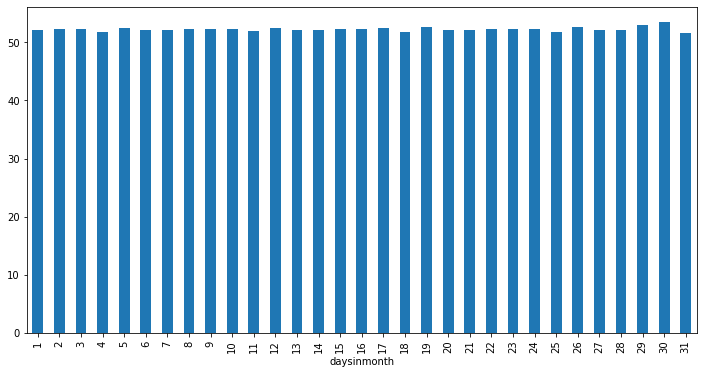

In [216]:
df.groupby(['daysinmonth'])['sales'].mean().plot(kind='bar',figsize=(12,6))

<AxesSubplot:xlabel='quarter', ylabel='sales'>

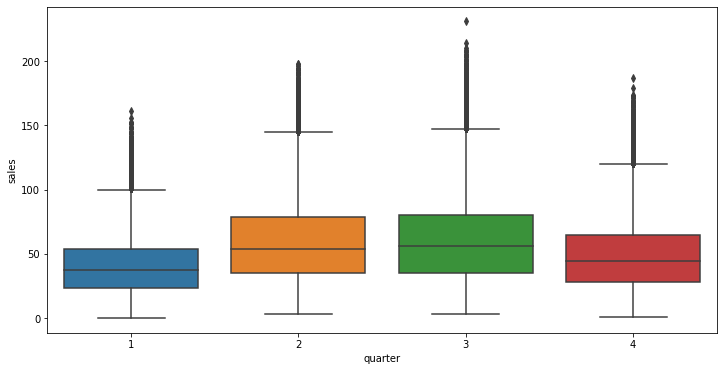

In [217]:
sns.boxplot(x=df['quarter'],y=df['sales'])

<AxesSubplot:xlabel='store', ylabel='sales'>

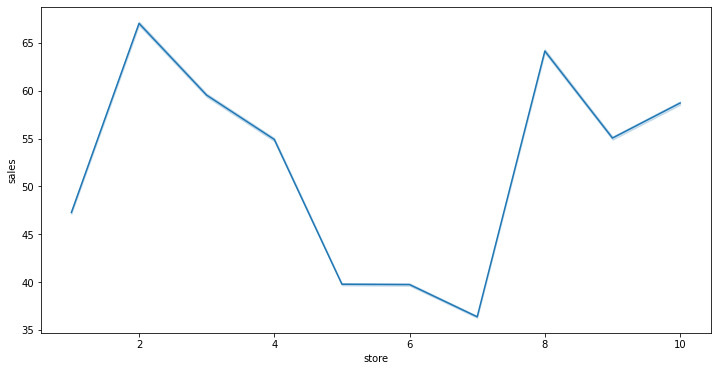

In [218]:
sns.lineplot(x=df['store'],y=df['sales'])

# Analysing 3 Stores and 3 Items 

In [219]:
storelist=[1,2,3]
itemlist=[1,2,3]
df_3Stores_3Items=df[df['store'].isin(storelist)]
#df_3Stores_3Items=df[df['item'].isin(itemlist)]

date
2017-01-01    15.645161
2017-02-01    17.392857
2017-03-01    18.096774
2017-04-01    22.566667
2017-05-01    24.935484
2017-06-01    28.333333
2017-07-01    28.161290
2017-08-01    25.612903
2017-09-01    24.533333
2017-10-01    21.290323
2017-11-01    22.266667
2017-12-01    17.193548
Freq: MS, Name: sales, dtype: float64


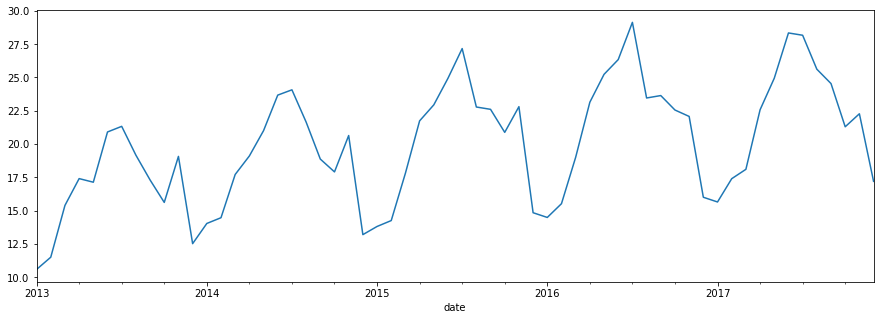

In [222]:
df_S1_I1 = df.loc[(df['store'] == 1) & (df['item'] == 1)]
df_S1_I1['date'].min()
df_S1_I1['date'].max()

df_S1_I1=df_S1_I1.sort_values('date')
df_S1_I1=df_S1_I1.groupby(['date'])['sales'].sum().reset_index()
df_S1_I1=df_S1_I1.set_index('date')
df_S1_I1

y=df_S1_I1['sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize=(15,5))
plt.show()


date
2017-01-01    38.774194
2017-02-01    42.714286
2017-03-01    51.354839
2017-04-01    65.033333
2017-05-01    67.774194
2017-06-01    73.800000
2017-07-01    76.451613
2017-08-01    67.387097
2017-09-01    64.100000
2017-10-01    56.387097
2017-11-01    65.400000
2017-12-01    47.580645
Freq: MS, Name: sales, dtype: float64


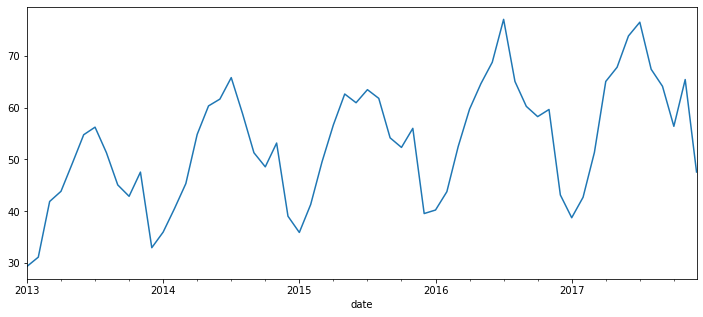

In [223]:
df_S1_I2 = df.loc[(df['store'] == 1) & (df['item'] == 2)]
df_S1_I2['date'].min()
df_S1_I2['date'].max()

df_S1_I2=df_S1_I2.sort_values('date')
df_S1_I2=df_S1_I2.groupby(['date'])['sales'].sum().reset_index()
df_S1_I2=df_S1_I2.set_index('date')
df_S1_I2

y=df_S1_I2['sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize=(12,5))
plt.show()

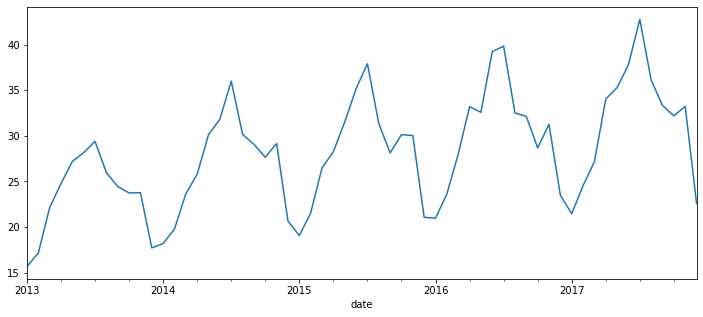

In [224]:
df_S2_I1 = df.loc[(df['store'] == 2) & (df['item'] == 1)]
df_S2_I1['date'].min()
df_S2_I1['date'].max()

df_S2_I1=df_S2_I1.sort_values('date')
df_S2_I1=df_S2_I1.groupby(['date'])['sales'].sum().reset_index()
df_S2_I1=df_S2_I1.set_index('date')
df_S2_I1

y=df_S2_I1['sales'].resample('MS').mean()
y.plot(figsize=(12,5))
plt.show()

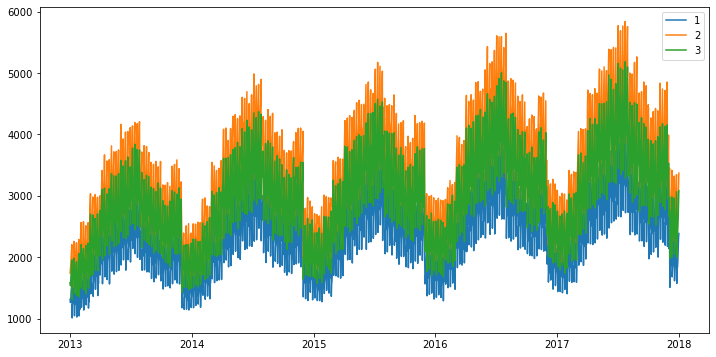

In [225]:
store_set=[1,2,3]
store_daily_sales = df.groupby(['store', 'date'], as_index=False)['sales'].sum()

plt.figure(figsize=(12,6))
for store in store_set:
     selected_data = store_daily_sales.loc[df['store'] == store]
     plt.plot(selected_data['date'], selected_data['sales'], label=store)
     
plt.legend()
plt.show()

In [ ]:
item_set=[1,2,3]
item_daily_sales = df.groupby(['item', 'date'], as_index=False)['sales'].sum()

plt.figure(figsize=(12,6))
for item in item_set:
     selected_data = item_daily_sales.loc[df['item'] == item]
     plt.plot(selected_data['date'], selected_data['sales'], label=item)
     
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm


In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=[12,6]
decomposition=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [203]:
def adf_test(series):
    result=adfuller(series,autolag = 'AIC')
    print("1. ADF : ",result[0])
    print("2. P-Value : ", result[1])
    print("3. Num Of Lags : ", result[2])
    print("4. Num Of Observations Used For ADF Regression:",result[3])
    print("5. Critical Values :")
    for key, val in result[4].items():
         print("\t",key, ": ", val)
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [252]:
adf_test(df_S1_I1)

1. ADF :  -3.157670556332793
2. P-Value :  0.022569380626572252
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 1802
5. Critical Values :
	 1% :  -3.4339840952648695
	 5% :  -2.8631452508003057
	 10% :  -2.567624583142913
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [256]:
df_S1_I1

sales
date             
2013-01-01     13
2013-01-02     11
2013-01-03     14
2013-01-04     13
2013-01-05     10
...           ...
2017-12-27     14
2017-12-28     19
2017-12-29     15
2017-12-30     27
2017-12-31     23

[1826 rows x 1 columns]

In [253]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model


In [233]:

arima_model = arimamodel(df_S1_I1['sales'])
arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11350.328, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12153.752, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11747.532, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11878.589, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16316.083, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11344.072, Time=2.69 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11669.509, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11336.690, Time=3.39 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11624.065, Time=0.94 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=11319.859, Time=4.52 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=11582.537, Time=1.46 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=11299.758, Time=4.38 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=11538.300, Time=1.56 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=11309.872, Time=3.95 sec
 ARIMA(4,0,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -5641.879
Date:                Mon, 05 Dec 2022   AIC                          11299.758
Time:                        19:37:26   BIC                          11343.837
Sample:                    01-01-2013   HQIC                         11316.017
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1975      0.098      2.026      0.043       0.006       0.389
ar.L1          0.9930      0.028     34.941      0.000       0.937       1.049
ar.L2         -0.1170      0.034     -3.487      0.000      -0.183      -0.051
ar.L3         -0.0113      0.033     -0.346      0.729      -0.075       0.053
ar.L4          0.0043      0.032      0.132      0.895      -0.059       0.068
ar.L5          0.1207      0.026      4.620      0.000       0.070       0.172
ma.L1         -0.8576      0.019    -44.283      0.000      -0.896      -0.820
sigma2        28.1850      0.859     32.821      0.000      26.502      29.868
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                19.20
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [240]:

## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [241]:
model_ARIMA=ARIMA(train_data['sales'],order=(5,0,1))

C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [242]:
model_ARIMA_fit=model_ARIMA.fit()
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  730
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -2194.604
Date:                Mon, 05 Dec 2022   AIC                           4405.207
Time:                        19:42:32   BIC                           4441.952
Sample:                    01-01-2013   HQIC                          4419.384
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6706      2.111      7.896      0.000      12.533      20.809
ar.L1          1.0101      0.047     21.543      0.000       0.918       1.102
ar.L2         -0.1347      0.054     -2.499      0.012      -0.240      -0.029
ar.L3          0.0113      0.052      0.217      0.828      -0.091       0.113
ar.L4         -0.0143      0.052     -0.275      0.784      -0.116       0.088
ar.L5          0.1136      0.040      2.814      0.005       0.034       0.193
ma.L1         -0.8522      0.034    -25.156      0.000      -0.919      -0.786
sigma2        23.8776      1.118     21.362      0.000      21.687      26.068
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                14.55
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.11
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [247]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2015,1,1),end=datetime(2017,12,31))

In [248]:
test_data['Predicted_ARIMA']=pred_arima

C:\Users\NW653DP\AppData\Local\Temp\ipykernel_40836\1962408701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred_arima


<AxesSubplot:xlabel='date'>

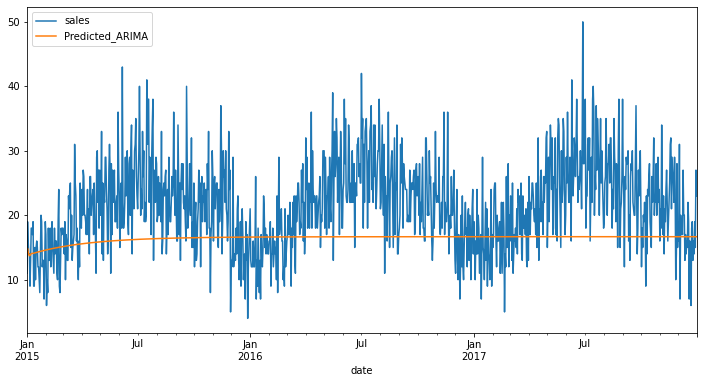

In [249]:
test_data[['sales','Predicted_ARIMA']].plot()

In [250]:
test_data[['sales','Predicted_ARIMA']]

sales  Predicted_ARIMA
date                              
2015-01-01     11        14.164708
2015-01-02     19        14.851610
2015-01-03     16        14.327409
2015-01-04     14        13.942770
2015-01-05     14        13.715281
...           ...              ...
2017-12-27     14        16.670568
2017-12-28     19        16.670568
2017-12-29     15        16.670568
2017-12-30     27        16.670568
2017-12-31     23        16.670569

[1096 rows x 2 columns]

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


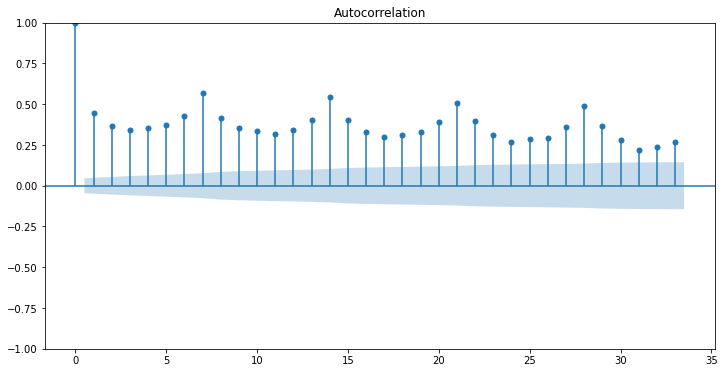

In [36]:
acf = plot_acf(df_S1_I1['sales'].dropna())


C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


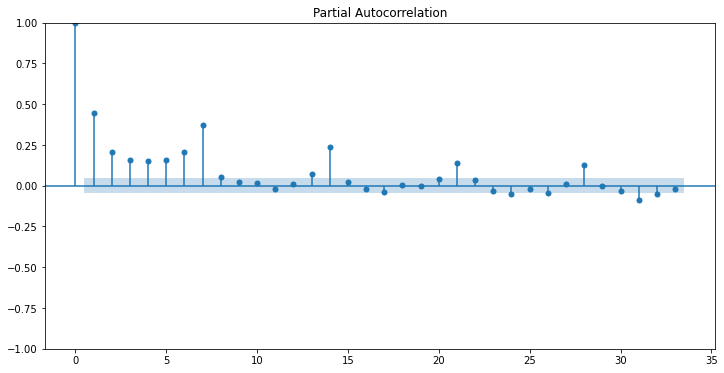

In [37]:
result = plot_pacf(df_S1_I1['sales'].dropna())

In [39]:
df_S1_I1


sales
date             
2013-01-01     13
2013-01-02     11
2013-01-03     14
2013-01-04     13
2013-01-05     10
...           ...
2017-12-27     14
2017-12-28     19
2017-12-29     15
2017-12-30     27
2017-12-31     23

[1826 rows x 1 columns]

In [234]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2014,12,31)
test_dataset_end=datetime(2017,12,31)

In [235]:
train_data=df_S1_I1[:train_dataset_end]
test_data=df_S1_I1[train_dataset_end+timedelta(days=1):test_dataset_end]

In [236]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [43]:
test_data

sales
date             
2015-01-01     11
2015-01-02     19
2015-01-03     16
2015-01-04     14
2015-01-05     14
...           ...
2017-12-27     14
2017-12-28     19
2017-12-29     15
2017-12-30     27
2017-12-31     23

[1096 rows x 1 columns]

In [125]:

## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [257]:

model_SARIMA=SARIMAX(train_data,order=(5,0,1),seasonal_order=(5,0,1,12),
                     enforce_invertibility=False,enforce_stationarity=False)

C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [258]:
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\NW653DP\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  730
Model:             SARIMAX(5, 0, 1)x(5, 0, 1, 12)   Log Likelihood               -2014.401
Date:                            Mon, 05 Dec 2022   AIC                           4054.802
Time:                                    20:28:47   BIC                           4113.299
Sample:                                01-01-2013   HQIC                          4077.468
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9801      0.057     17.276      0.000       0.869       1.091
ar.L2         -0.0747      0.065     -1.144      0.253      -0.203       0.053
ar.L3          0.0275      0.063      0.437      0.662      -0.096       0.151
ar.L4         -0.0103      0.065     -0.159      0.873      -0.137       0.116
ar.L5          0.0771      0.051      1.512      0.130      -0.023       0.177
ma.L1         -0.8680      0.034    -25.268      0.000      -0.935      -0.801
ar.S.L12       0.0893      0.394      0.227      0.821      -0.684       0.862
ar.S.L24      -0.1163      0.059     -1.957      0.050      -0.233       0.000
ar.S.L36      -0.0015      0.072     -0.021      0.983      -0.142       0.139
ar.S.L48       0.0160      0.046      0.347      0.729      -0.075       0.107
ar.S.L60      -0.0942      0.047     -2.016      0.044      -0.186      -0.003
ma.S.L12      -0.1776      0.396     -0.449      0.654      -0.953       0.598
sigma2        27.9813      1.558     17.958      0.000      24.927      31.035
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                12.11
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.11
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [243]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2015-01-01 00:00:00
2017-12-31 00:00:00


In [259]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2015,1,1),end=datetime(2017,12,31))
residuals=test_data['sales']-pred_Sarima


<AxesSubplot:xlabel='date'>

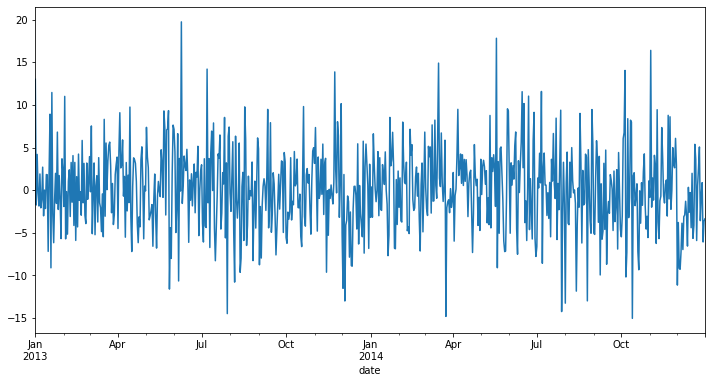

In [260]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

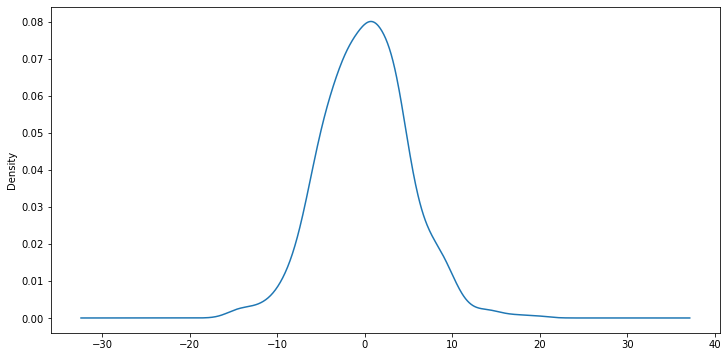

In [261]:
model_SARIMA_fit.resid.plot(kind='kde')

In [262]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\NW653DP\AppData\Local\Temp\ipykernel_40836\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [192]:
test_data

sales  Predicted_SARIMA
date                               
2015-01-01     11         13.065859
2015-01-02     19         13.446854
2015-01-03     16         14.510031
2015-01-04     14         13.999604
2015-01-05     14         13.841171
...           ...               ...
2017-12-27     14         14.157595
2017-12-28     19         14.157595
2017-12-29     15         14.157595
2017-12-30     27         14.157595
2017-12-31     23         14.157595

[1096 rows x 2 columns]

<AxesSubplot:xlabel='date'>

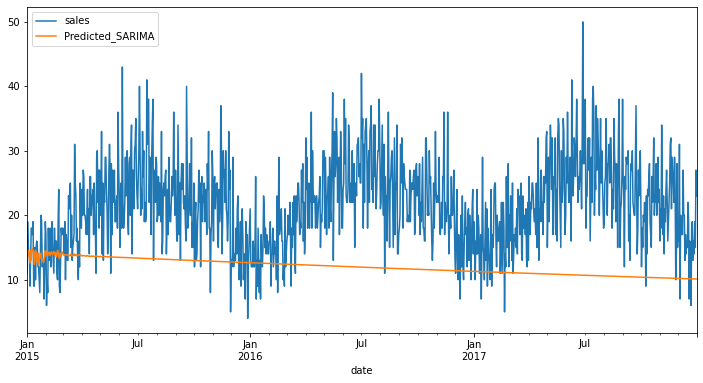

In [263]:
test_data[['sales','Predicted_SARIMA']].plot()

In [133]:
item_daily_sales

item       date  sales
0         1 2013-01-01    133
1         1 2013-01-02     99
2         1 2013-01-03    127
3         1 2013-01-04    145
4         1 2013-01-05    149
...     ...        ...    ...
91295    50 2017-12-27    511
91296    50 2017-12-28    587
91297    50 2017-12-29    596
91298    50 2017-12-30    612
91299    50 2017-12-31    626

[91300 rows x 3 columns]

In [35]:
#df_SalesYrWise['months'] = df_SalesYrWise['date'].apply(lambda x:x.strftime('%B'))
#df_SalesYrWise.groupby('months')['sales'].sum().plot(ind='bar')
df_SalesYrWise.info()

NameError: name 'df_SalesYrWise' is not defined

In [24]:
df.groupby(['store','item']).agg({'sales': ['min','max','mean','sum', 'std', 'median']})

#df.groupby(['store', 'item']).agg({'sales': ['sum','mean', 'std', 'median'],})

sales                                          
             min  max       mean     sum        std median
store item                                                
1     1        4   50  19.971522   36468   6.741022   19.0
      2       13  115  53.148959   97050  15.005779   52.0
      3        8   70  33.208105   60638  10.072529   33.0
      4        4   43  19.956188   36440   6.640618   20.0
      5        3   37  16.612815   30335   5.672102   16.0
...          ...  ...        ...     ...        ...    ...
10    46      23  125  66.046550  120601  18.114991   65.0
      47       6   56  24.755750   45204   7.924820   24.0
      48      21  120  57.814896  105570  15.898538   57.0
      49       6   69  33.032311   60317  10.091610   32.0
      50      24  150  74.037240  135192  19.937566   73.0

[500 rows x 6 columns]

In [25]:
daily_sales = df.groupby('date', as_index=False)['sales'].sum()
store_daily_sales = df.groupby(['store', 'date'], as_index=False)['sales'].sum()
item_daily_sales = df.groupby(['item', 'date'], as_index=False)['sales'].sum()

In [47]:
store_daily_sales['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [44]:
store_set=df['store'].unique()

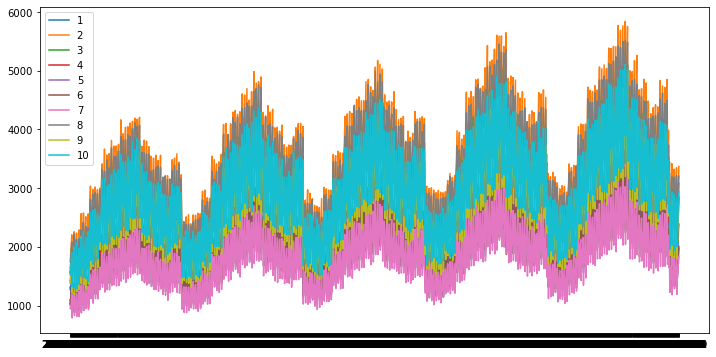

In [48]:
plt.figure(figsize=(12,6))
for store in store_set:
     selected_data = store_daily_sales.loc[df['store'] == store]
     plt.plot(selected_data['date'], selected_data['sales'], label=store)
     
plt.legend()
plt.show()

<AxesSubplot:>

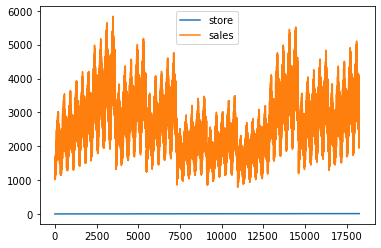

In [40]:
store_daily_sales.plot()